In [1]:
#导入相应包
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg.misc import norm

In [2]:
#读取相应数据
data,label=load_svmlight_file('australian_scale')
data = data.todense()  

In [3]:
#将feature和label划分成training data和validation data
# feature_train 这是特征的训练集合
# feature_val 这是特征的测试集合
# label_train 这是标签的训练集合
# label_val 这是标签的测试集合
feature_train,feature_val,label_train,label_val = train_test_split(data,label,test_size=0.30, random_state=42)

In [4]:
#向矩阵中加入偏执项的函数
def add_bias(matrix):    
    bias = []
    #构造偏执项list
    for i in range(matrix.shape[0]):
        bias.append(1)
    #向矩阵中加入一列偏执项
    matrix = np.column_stack((matrix,bias))
    return matrix

#在特征集合中加入偏执项
feature_train = add_bias(feature_train)
feature_val = add_bias(feature_val)

In [5]:
#构造并初始化系数矩阵
w = np.ones((1,15))


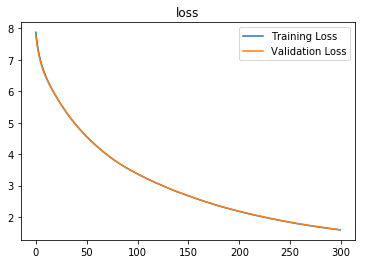

In [105]:
#梯度下降算法函数
# x 表示特征训练集
# y 表示标签训练集
# x_val 表示特征验证集
# y_val 表示标签验证集
# w 表示初始化的稀疏矩阵
# learning_rate 表示学习率
# maxiterations 表示最大迭代次数
def gradient_descent(x,y,x_val,y_val,C,w,learning_rate,maxiterations):
    
    #将label进行转置
    y = np.asmatrix(y)
    y = np.transpose(y)
    y_val = np.asmatrix(y_val)
    y_val = np.transpose(y_val)
    w = np.asmatrix(w)
    w = np.transpose(w)
    

    #定义迭代次数和loss值
    iteration_time = [] #迭代次数
    train_loss_value = [] #训练数据的loss值
    val_loss_value = [] #验证数据的loss值

    
    #进行迭代计算
    for i in range(0,maxiterations):
        
        
        #计算SVM损失函数的梯度
        gradient = 0
        for j in range(len(x)):
            if 1 - (y[j].tolist()[0][0])*( np.dot(x[j],w).tolist()[0][0] ) >= 0 :
                gradient = gradient - (y[j].tolist()[0][0])*(x[j])
        
        gradient = gradient*C
        gradient = np.transpose(gradient)+w
        
    

        #对系数矩阵进行更新
        w = w - learning_rate*gradient

        
        #定义损失函数并求出损失函数的结果
        #训练集上的loss值
        train_loss = 0
        for j in range(len(x)):
            train_loss = train_loss +  max(0,1 - (y[j].tolist()[0][0])*( np.dot(x[j],w).tolist()[0][0] ))  
        train_loss = train_loss*C/x.shape[0]
        train_loss = train_loss + ((norm(w))**2)/2
        
        
#         #验证集上的loss值
        val_loss = 0
        for j in range(len(x_val)):
            val_loss = val_loss +  max(0,1 - (y_val[j].tolist()[0][0])*( np.dot(x_val[j],w).tolist()[0][0] ))
        val_loss = val_loss*C/x_val.shape[0]
        val_loss = val_loss + ((norm(w))**2)/2

        
        #记录迭代次数和loss的值
        iteration_time.append(i)
        train_loss_value.append(train_loss)
        val_loss_value.append(val_loss)
        
        
    
   
    #画出loss函数图像
    plt.plot(iteration_time, train_loss_value , label='Training Loss')
    plt.plot(iteration_time, val_loss_value , label='Validation Loss')

    plt.title('loss')
    plt.legend()
    plt.show()





gradient_descent(feature_train,label_train,feature_val,label_val,0.5,w,0.001,300)